In [41]:
import torch
import torch.nn as nn

In [42]:
class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        l1 = torch.relu(self.fc1(x)) # Layer 1
        o = self.fc2(l1) # Output
        return o
    

In [43]:
model = SimpleNet()

# Fix the weights of the model
model.fc1.weight.data = torch.tensor([[ 0.2476,  0.2911],[ 0.6215, -0.0939]])
model.fc1.bias.data = torch.tensor([-0.7041, -0.3302])

model.fc2.weight.data = torch.tensor([[0.6663, 0.7048]])
model.fc2.bias.data = torch.tensor([0.2907])

In [44]:
input = torch.tensor([[2, 4]], dtype=torch.float32)
output = model(input)
target = torch.tensor([[5]], dtype=torch.float32)
criterion = nn.MSELoss()
loss = criterion(output, target)

In [45]:
print (f"Weights for layer 1: {model.fc1.weight}")
print(f"Bias for layer 1: {model.fc1.bias}")

print (f"Weights for layer 2: {model.fc2.weight}")
print(f"Bias for layer 2: {model.fc2.bias}")

print(f"Loss: {loss}")

Weights for layer 1: Parameter containing:
tensor([[ 0.2476,  0.2911],
        [ 0.6215, -0.0939]], requires_grad=True)
Bias for layer 1: Parameter containing:
tensor([-0.7041, -0.3302], requires_grad=True)
Weights for layer 2: Parameter containing:
tensor([[0.6663, 0.7048]], requires_grad=True)
Bias for layer 2: Parameter containing:
tensor([0.2907], requires_grad=True)
Loss: 13.645870208740234


In [46]:
# Activation of neuron 1 for layer 1
l1_n1 = torch.relu(model.fc1.weight.data[0][0] * input[0][0] + model.fc1.weight.data[0][1] * input[0][1] + model.fc1.bias.data[0])
print(f"Activation of neuron 1 for layer 1: {l1_n1}")

# Activation of neuron 2 for layer 1
l1_n2 = torch.relu(model.fc1.weight.data[1][0] * input[0][0] + model.fc1.weight.data[1][1] * input[0][1] + model.fc1.bias.data[1])
print(f"Activation of neuron 2 for layer 1: {l1_n2}")

# Activation of neuron 1 for layer 2
l2_n1 = (model.fc2.weight.data[0][0] * l1_n1 + model.fc2.weight.data[0][1] * l1_n2 + model.fc2.bias.data[0])
print(f"Activation of neuron 1 for layer 2: {l2_n1}")

Activation of neuron 1 for layer 1: 0.9555000066757202
Activation of neuron 2 for layer 1: 0.5372000932693481
Activation of neuron 1 for layer 2: 1.3059682846069336


In [47]:
# Print activations for layer 1
print(f"Activations for layer 1: {torch.relu(model.fc1(input))}")

# Print activations for layer 2
print(f"Activations for layer 2: {(model.fc2(torch.relu(model.fc1(input))))}")

Activations for layer 1: tensor([[0.9555, 0.5372]], grad_fn=<ReluBackward0>)
Activations for layer 2: tensor([[1.3060]], grad_fn=<AddmmBackward0>)


In [48]:
from torchviz import make_dot

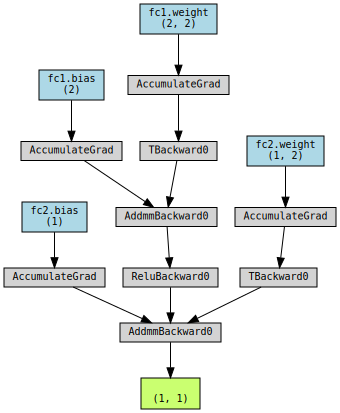

In [49]:
# Visualize the model
make_dot(output, params=dict(model.named_parameters()))


In [50]:
loss.backward()

print (f"Gradients for layer 1: {model.fc1.weight.grad}")
print (f"Gradients for layer 2: {model.fc2.weight.grad}")

Gradients for layer 1: tensor([[ -9.8453, -19.6907],
        [-10.4142, -20.8284]])
Gradients for layer 2: tensor([[-7.0593, -3.9689]])
